In [16]:
#import scipy as sio

In [17]:
#import sys
#!{sys.executable} -m pip install scipy

# question 1

In [18]:
import numpy as np
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure
import numpy as np
import pylab as pl
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
import pandas as pd
import scipy.io as sio
import sklearn
import sklearn.neighbors
import sklearn.datasets
from sklearn import decomposition, manifold


# Q1.1-Swiss Role Dataset
### section1

In [19]:


u = np.random.uniform(0, 20, 3000)
v = np.random.uniform(0, 1, 3000)
x = u * np.cos(u)
y = u * np.sin(u)
z = v

color = u / u.max()



# section2

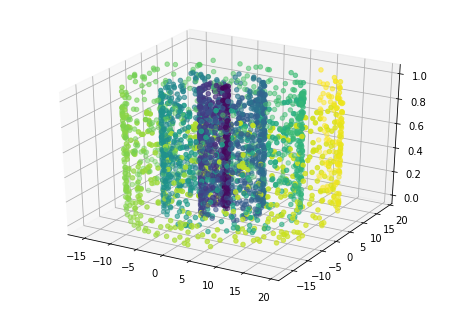

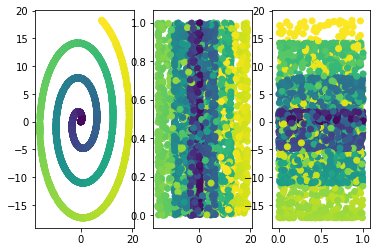

In [20]:

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c=color)
fig, ax = plt.subplots(1, 3)
ax[0].scatter(x, y, c=color)
ax[1].scatter(x, z, c=color)
ax[2].scatter(z, y, c=color)
plt.show()

In [21]:
"""tmp=[1 ,2 ,3,4, 5, 6,7, 8, 9]
tmp=pd.DataFrame(tmp)
tmp.shape

print(tmp.iloc[:,0].values)"""

'tmp=[1 ,2 ,3,4, 5, 6,7, 8, 9]\ntmp=pd.DataFrame(tmp)\ntmp.shape\n\nprint(tmp.iloc[:,0].values)'

# Q1.2-Face Dataset
### section1+2

(4096, 698)


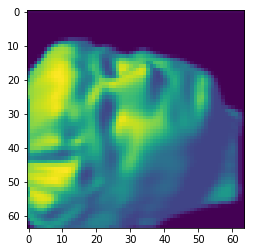

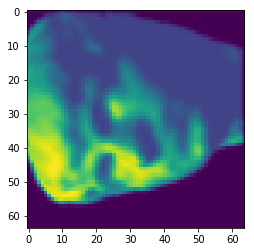

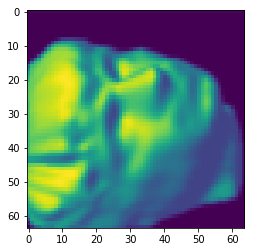

In [22]:

data = sio.loadmat('./face_data.mat')
images = data['images']
print(np.shape(images))
facesData =pd.DataFrame(images.T)
facesData.shape
# section2
def plot3images(pd_data,size): 
    plt.imshow(pd_data.iloc[0,:].values.reshape((size,size)))
    plt.show()
    plt.imshow(pd_data.iloc[1,:].values.reshape((size,size)))
    plt.show()
    plt.imshow(pd_data.iloc[2,:].values.reshape((size,size)))
    plt.show()

plot3images(facesData,64)

### section4-
### Each point is an image such that it has dimension of D=4096 and the whole (filtered)dataset contains N=698 images.


# Q1.3-MNIST Dataset
### section1

In [23]:

import pickle , gzip
import numpy as np
f = gzip.open( './mnist.pkl.gz' , 'rb' )
train_set , valid_set , test_set =pickle . load(f,encoding='latin1')
f.close
train_set_images =train_set[0]
train_set_images=train_set_images.T
train_set_digit_number =train_set[1]
np.shape(train_set_images)
data =pd.DataFrame(train_set_images.T)
label = pd.Series(train_set_digit_number.T)

In [24]:
filtered_data=data[label>6]
filtered_data.shape

(15005, 784)

# section2

In [25]:

filtered_data.iloc[5,:]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
754    0.0
755    0.0
756    0.0
757    0.0
758    0.0
759    0.0
760    0.0
761    0.0
762    0.0
763    0.0
764    0.0
765    0.0
766    0.0
767    0.0
768    0.0
769    0.0
770    0.0
771    0.0
772    0.0
773    0.0
774    0.0
775    0.0
776    0.0
777    0.0
778    0.0
779    0.0
780    0.0
781    0.0
782    0.0
783    0.0
Name: 29, Length: 784, dtype: float32

# section3

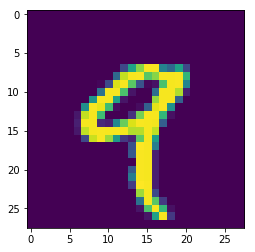

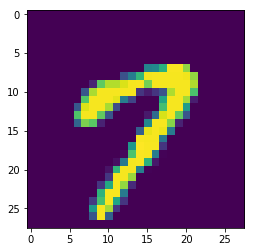

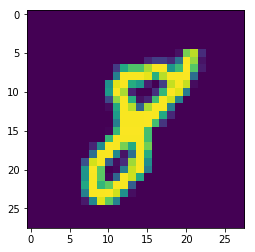

In [26]:

plot3images(filtered_data,28)

# section4
## Each point is an image such that it has dimension of D=783 and the whole (filtered)dataset contains N=15005 images.

# question 2

In [27]:
data, label = sklearn.datasets.make_swiss_roll(n_samples=1000, noise=0.0, random_state=None)

In [28]:
data = pd.DataFrame(data)

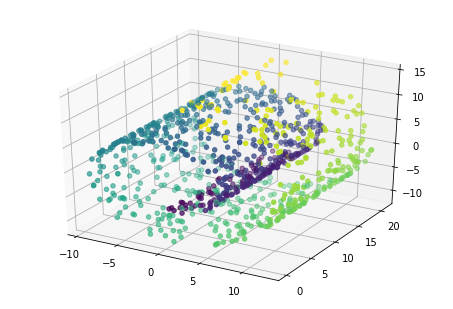

In [29]:
ax = Axes3D(plt.figure())
ax.scatter(data[0],data[1],data[2],c=label)
plt.show()

In [30]:
#question 2.1.1 pca to the data set to 2 parameters
pr_dict ={}
pr_dict['extension']= data
pr_dict['pca'] = pd.DataFrame(decomposition.PCA(n_components=2 ).fit_transform(data))
pr_dict['kpca'] = pd.DataFrame(decomposition.KernelPCA(n_components=2, kernel='rbf',gamma=0.03 ).fit_transform(data))


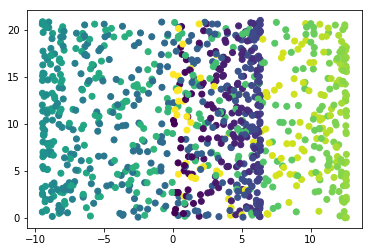

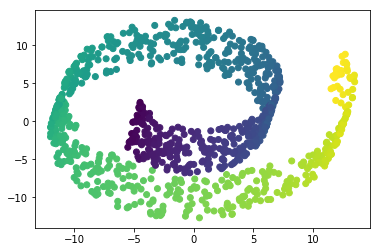

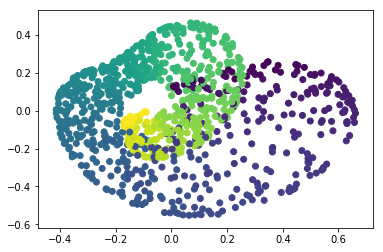

In [31]:
for key in pr_dict.keys():
    plt.scatter(pr_dict[key][0],pr_dict[key][1],c=label)
    plt.show()

we after iterating diferent gamma values $\gamma = \frac{1}{2*\sigma^2}$ we find that $\gamma = 0.03$ represents the data the best

## question 2.1.1
- 3

In [32]:
# The idea is to unfold the data knowing how the data is build 
# 
data2= data.copy()
data2['arctan']= np.arctan(data[0]/data[2])*100
data2['big_zed']= data[1]*100

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:161: RuntimeWarning: invalid value encountered in log1p
  **(kw_args if kw_args else {}))


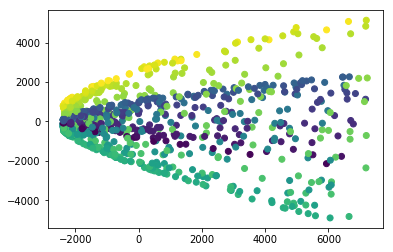

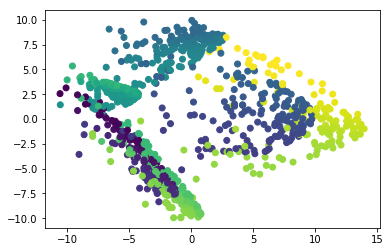

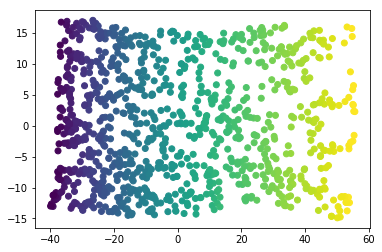

In [33]:
#since we have told we can use any sklearn algohrimt we cheat and use isomap to unfold the data and then maximise the fetures 
# features to a biger dimention to make look the original fetures really small, we could also use some 
# transformation from x in R^n to phi(x) in R^m s.t m>>n 


# polinom try 
poli = data.copy()
# We use a polinom of order 3 which will yield us 20 new features we did include the original ones .... 
pol2 = sklearn.preprocessing.PolynomialFeatures(degree=3).fit_transform(poli)

# We also use a log transformacion over the polinomial (trail and error ) it didn't yield better results 
transformer = sklearn.preprocessing.FunctionTransformer(np.log1p).fit_transform(pol2)

#PCA descomposition of the data after add the fetures 
c= decomposition.PCA(n_components=2 ).fit_transform(pol2).T
d= decomposition.PCA(n_components=2 ).fit_transform((pd.DataFrame(transformer).fillna(0).values)).T
plt.scatter(c[0],c[1],c=label)
plt.show()
plt.scatter(d[0],d[1],c=label)
plt.show()

#we also cheat with the ideas and did a Isomo unfold of the data set and then run a pca
# by doing this we found the best results
a= data.copy()
cheat_iso = manifold.Isomap(n_components=3,n_neighbors=7).fit_transform(data)
a[3]=cheat_iso.T[0]
a[4]=cheat_iso.T[1]
a[5]=cheat_iso.T[2]
b= decomposition.PCA(n_components=2 ).fit_transform(a).T
plt.scatter(b[0],b[1],c=label)
plt.show()

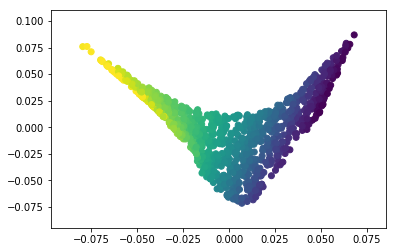

In [34]:
#Question 2.1.2
# LLE and Isomap

lle= manifold.LocallyLinearEmbedding(n_components=2,n_neighbors=12).fit_transform(data).T
plt.scatter(lle[0],lle[1],c=label)
plt.show()

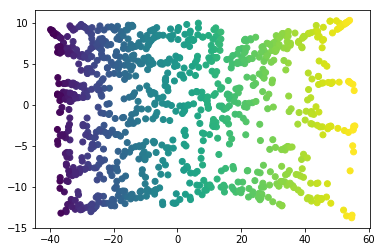

In [35]:
iso = manifold.Isomap(n_components=2,n_neighbors=7).fit_transform(data).T
plt.scatter(iso[0],iso[1],c=label)
plt.show()

### Question 2.1.3 - 1
- We will write a funtion that choose to randon points  

In [36]:
# section 1 - choose two nearest neighbors- 
def find_distances(data, data_reduce):
    nbrs= sklearn.neighbors.NearestNeighbors(n_neighbors= 2).fit(data_reduce)
    distances, labels = nbrs.kneighbors(data_reduce)
    index = pd.DataFrame(labels).sample(n=1)
    two_points_original = data.loc[index.values[0],:]
    two_points_PR = data_reduce.loc[index.values[0],:]
    
    orinal_dist = np.linalg.norm(two_points_original)
    PR_dist = np.linalg.norm(two_points_PR)
    print(f'The original distance is {orinal_dist}, the distance in the paramer reduction is {PR_dist}')


find_distances(data, pr_dict['pca'])   
find_distances(data,pr_dict['kpca'])
find_distances(data,pd.DataFrame(iso))
find_distances(data,pd.DataFrame(lle))


The original distance is 31.341414103594058, the distance in the paramer reduction is 17.103038365589978
The original distance is 19.252490598435237, the distance in the paramer reduction is 0.18609961456761664
The original distance is 22.560907529394658, the distance in the paramer reduction is 871.566727242565
The original distance is 22.560907529394658, the distance in the paramer reduction is 1.4142135623730954


In [37]:
# section 2 - choose two points that are not in each other's 40'th nearest neighbors-
def find_distance_40(data, data_reduce):
    nbrs= sklearn.neighbors.NearestNeighbors(n_neighbors= 50).fit(data)
    distances, labels = nbrs.kneighbors(data)
    pd.DataFrame(labels).head()
    tmp=pd.DataFrame(labels)
    while(True):
        pair = np.reshape(tmp.sample(n=1).values,-1)
        pair = [pair[0],pair[-1]]
        if pair[0] not in tmp.loc[pair[1],:]:
            break 
    two_points_original = data.loc[pair,:]
    two_points_PR = data_reduce.loc[pair,:]
    orinal_dist = np.linalg.norm(two_points_original)
    PR_dist = np.linalg.norm(two_points_PR)
    print(f'The original distance is {orinal_dist}, the distance in the paramer reduction is {PR_dist}')
    

In [38]:
find_distance_40(data, pr_dict['pca'])   
find_distance_40(data,pr_dict['kpca'])
find_distance_40(data,pd.DataFrame(iso).T)
find_distance_40(data,pd.DataFrame(lle).T)

The original distance is 12.270494882902808, the distance in the paramer reduction is 5.562563630231154
The original distance is 23.324764146074074, the distance in the paramer reduction is 0.5002098876535308
The original distance is 26.250963632974912, the distance in the paramer reduction is 14.839222947656635
The original distance is 26.509980961722455, the distance in the paramer reduction is 0.07859231293618925


# section 3 - choose two points that are not in each other's 40'th nearest neighbors-


In [39]:
def find_12(data, data_reduce):
    nbrs_high= sklearn.neighbors.NearestNeighbors(n_neighbors= 12).fit(data)
    nbrs_low= sklearn.neighbors.NearestNeighbors(n_neighbors= 12).fit(data_reduce)
    distances_high, labels_high = nbrs_high.kneighbors(data)
    distances_low, labels_low = nbrs_low.kneighbors(data_reduce)
    c=[]
    for dataIdx in data.index:
        high=labels_high[dataIdx,:]
        low=labels_low[dataIdx,:]
        k_nn_not_12=np.intersect1d(high,low)
        # assumed that the meaning was to exclude from the 12NN in low-dimension, those who was also included in high-dimension-
        low=np.delete(low,k_nn_not_12)
        c.append(data_reduce.loc[low,:])
        # assuming that the meaning of |c(i)| == number of data points in the group c(i)
    print(f' mean of all c = {np.mean(([len(x) for x in c]))}')
    return c
#displaying mean value of c-
c=dict()
c['pca']=find_12(data, pr_dict['pca']) 
c['kpca']=find_12(data,pr_dict['kpca'])
c['iso']=find_12(data,pd.DataFrame(iso).T)
c['lle']=find_12(data,pd.DataFrame(lle).T)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  if sys.path[0] == '':


 mean of all c = 11.919
 mean of all c = 11.931
 mean of all c = 11.88
 mean of all c = 11.916


In [40]:
c['pca'][1]

,0,1
1,2.716436,-3.954824
282,2.496203,-3.966411
52,2.609104,-4.149098
40,2.955702,-3.957513
232,2.513580,-3.690285
220,2.182853,-3.593990
767,3.326408,-4.246557
898,3.423306,-4.045527
359,3.542582,-3.930559
753,2.411776,-4.920388


In [41]:
# section 3 - calculate the mean MDS measure of distances -
def mean_MDS(data,data_reduce):
    """nbrs_high= sklearn.neighbors.NearestNeighbors(n_neighbors= 12).fit(data)
    nbrs_low= sklearn.neighbors.NearestNeighbors(n_neighbors= 12).fit(data_reduce)
    distances_high, labels_high = nbrs_high.kneighbors(data)
    distances_low, labels_low = nbrs_low.kneighbors(data_reduce)
    c=[]"""
    c=find_12(data, data_reduce) 
    mds=[] 
    for num, c_i in enumerate(c):
        x_i=data.loc[num,:]
        y_i=data_reduce.loc[num,:]
        sum_i=0
        for dataIdx in c_i.index:
            x=data.loc[dataIdx,:]
            y=data_reduce.loc[dataIdx,:]
            high_dist = np.linalg.norm([x,x_i])
            low_dist = np.linalg.norm([y,y_i])
            inner_argument=np.square(high_dist-low_dist)
            sum_i=sum_i+inner_argument
        mds.append(sum_i/len(c_i))
    print(f' mean of all mds = {np.mean(mds)}')
    return mds

#displaying mean value of mds-
mds=dict()
mds['pca']= mean_MDS(data, pr_dict['pca']) 
mds['kpca']=mean_MDS(data,pr_dict['kpca'])
mds['iso']= mean_MDS(data,pd.DataFrame(iso).T)
mds['lle']= mean_MDS(data,pd.DataFrame(lle).T)

#for point=3 for example-


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  if sys.path[0] == '':


 mean of all c = 11.919
 mean of all mds = 104.46995736146954
 mean of all c = 11.931
 mean of all mds = 459.4610383199903
 mean of all c = 11.88
 mean of all mds = 523.879517425236
 mean of all c = 11.916
 mean of all mds = 474.4373391614213


In [42]:

nbrs= sklearn.neighbors.NearestNeighbors(n_neighbors= 50).fit(data)
distances, labels = nbrs.kneighbors(data)
pd.DataFrame(labels).head()
tmp=pd.DataFrame(labels)
while(True):
    pair = np.reshape(tmp.sample(n=1).values,-1)
    pair = [pair[0],pair[-1]]
    if pair[0] not in tmp.loc[pair[1],:]:
        break 


# 2.2 Face Dataset
### 2.2.1 PCA Based Methods + 2.2.2 Manifold Based Methods + 
###    2.2.3 Euclidean distances in the low-dimensional representation

In [61]:

def Repeat_sections(data,d):    
    pr_dict ={}
    data=data#NO NEED IN TRANSPOSE
    pr_dict['extension']= data
    # 2.2.1 PCA Based Methods
    pr_dict['pca'] = (decomposition.PCA(n_components=d ,whiten=True).fit_transform(data))
    pr_dict['kpca'] = decomposition.KernelPCA(n_components=d ,kernel='rbf',gamma=0.03).fit_transform(data)
    print('original')
    print(f' shape of faces = {data.shape}')
    plot3images(data,int(math.sqrt(data.shape[1])))
    print(int(math.sqrt(d)))
    print(f' USing PCA, n_components= {d}')
    projectedFaces=pd.DataFrame(pr_dict['pca'])
    print(f' shape of projected faces = {projectedFaces.shape}')
    plot3images(projectedFaces,int(math.sqrt(d)))
    print(f' USing KPCA, n_components= {d}')
    k_projectedFaces=pd.DataFrame(pr_dict['kpca'])
    print(f' shape of projected faces = {k_projectedFaces.shape}')
    plot3images(k_projectedFaces,int(math.sqrt(d)))
    # 2.2.2 Manifold Based Methods
    pr_dict['lle']= manifold.LocallyLinearEmbedding(n_components=d,n_neighbors=7).fit_transform(data)
    print(f' USing LLE, n_components= {d}')
    LLE_projectedFaces=pd.DataFrame(pr_dict['lle'])
    print(f' shape of faces = {data.shape}')
    print(f' shape of projected faces = {LLE_projectedFaces.shape}')
    plot3images(LLE_projectedFaces,int(math.sqrt(d)))
    
    pr_dict['iso'] = manifold.Isomap(n_components=d,n_neighbors=7).fit_transform(data)
    print(f' USing ISO, n_components= {d}')
    ISO_projectedFaces=pd.DataFrame(pr_dict['iso'])
    print(f' shape of faces = {data.shape}')
    print(f' shape of projected faces = {ISO_projectedFaces.shape}')
    plot3images(ISO_projectedFaces,int(math.sqrt(d)))
    plt.show()
    
    # 2.2.3 Euclidean distances in the low-dimensional representation
    print(f' Euclidean distances Using PCA, n_components= {d}')
    find_distances(data, projectedFaces)
    find_distance_40(data, projectedFaces)
    find_12(data, projectedFaces)
    mean_MDS(data,projectedFaces)
    print(f' Euclidean distances Using KPCA, n_components= {d}')
    find_distances(data, k_projectedFaces)
    find_distance_40(data, k_projectedFaces)
    find_12(data, k_projectedFaces)
    mean_MDS(data,k_projectedFaces)

    print(f' Euclidean distances Using LLE, n_components= {d}')
    find_distances(data, LLE_projectedFaces)
    find_distance_40(data, LLE_projectedFaces)
    find_12(data, LLE_projectedFaces)
    mean_MDS(data,LLE_projectedFaces)
    
    print(f' Euclidean distances Using ISO, n_components= {d}')
    find_distances(data, ISO_projectedFaces)
    find_distance_40(data, ISO_projectedFaces)
    find_12(data, ISO_projectedFaces)
    mean_MDS(data,ISO_projectedFaces)

original
 shape of faces = (698, 4096)


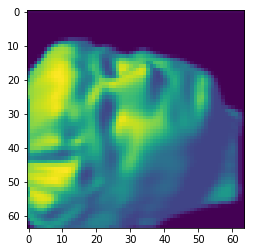

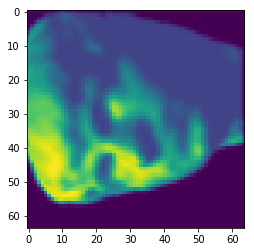

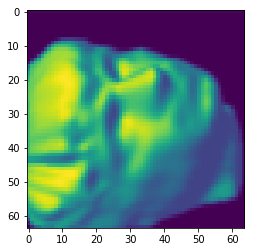

25
 USing PCA, n_components= 625
 shape of projected faces = (698, 625)


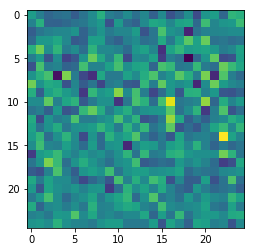

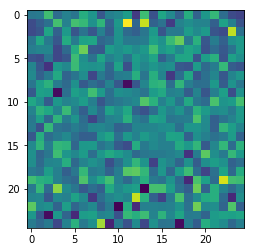

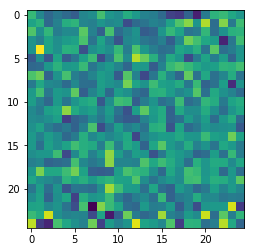

 USing KPCA, n_components= 625
 shape of projected faces = (698, 625)


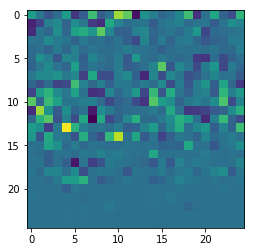

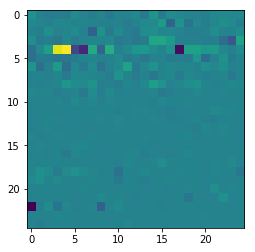

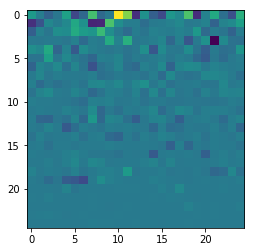

 USing LLE, n_components= 625
 shape of faces = (698, 4096)
 shape of projected faces = (698, 625)


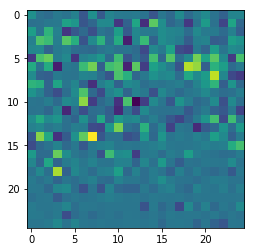

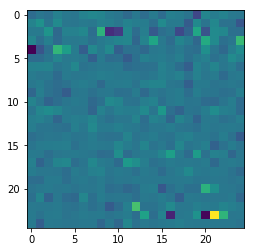

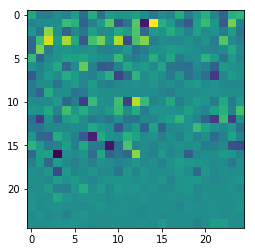

 USing ISO, n_components= 625
 shape of faces = (698, 4096)
 shape of projected faces = (698, 625)


D:\Anaconda3\lib\site-packages\sklearn\decomposition\kernel_pca.py:264: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)


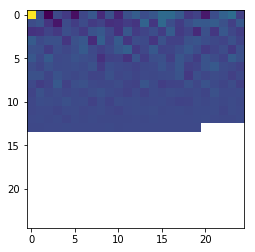

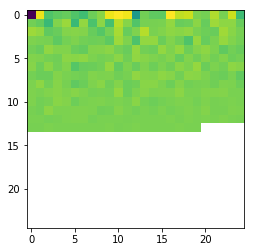

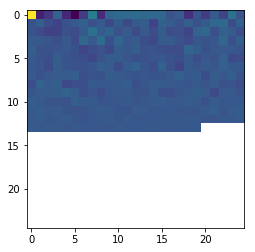

 Euclidean distances Using PCA, n_components= 625
The original distance is 36.07501894217518, the distance in the paramer reduction is 31.062465972793696
The original distance is 49.76405930642295, the distance in the paramer reduction is 36.38683053988179


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  if sys.path[0] == '':


 mean of all c = 11.974212034383955
 mean of all c = 11.974212034383955
 mean of all mds = 137.2075975272041
 Euclidean distances Using KPCA, n_components= 625
The original distance is 29.23593663934944, the distance in the paramer reduction is 1.4012552659427173
The original distance is 51.01443061611337, the distance in the paramer reduction is 1.415260576253686
 mean of all c = 11.833810888252149
 mean of all c = 11.833810888252149
 mean of all mds = 1563.8274417243751
 Euclidean distances Using LLE, n_components= 625
The original distance is 35.33868347783371, the distance in the paramer reduction is 1.1542199065768062
The original distance is 43.24729624552315, the distance in the paramer reduction is 1.3420989726305492
 mean of all c = 11.972779369627506
 mean of all c = 11.972779369627506
 mean of all mds = 1628.5364125206731
 Euclidean distances Using ISO, n_components= 625


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [62]:
#now trying the function on Face Dataset
import math

#print(partialfacesData)
face_dataset_PCA_methods=Repeat_sections(facesData,625)

1000
original
 shape of faces = (1000, 784)


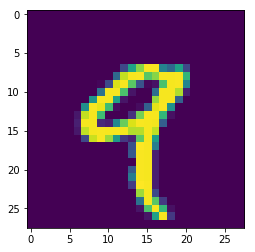

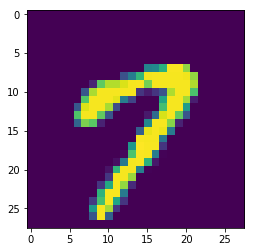

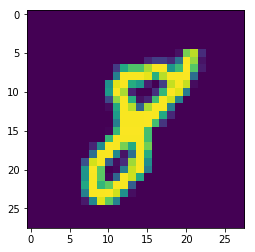

20
 USing PCA, n_components= 400
 shape of projected faces = (1000, 400)


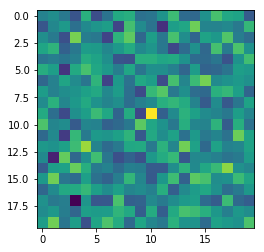

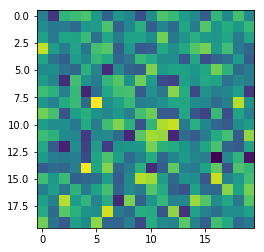

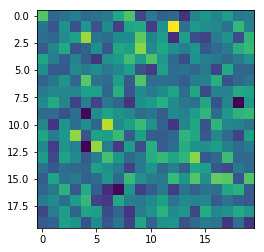

 USing KPCA, n_components= 400
 shape of projected faces = (1000, 400)


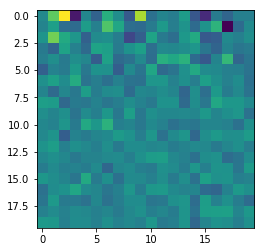

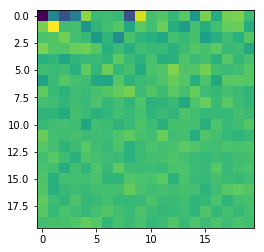

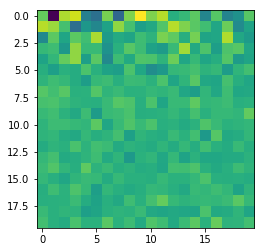

 USing LLE, n_components= 400
 shape of faces = (1000, 784)
 shape of projected faces = (1000, 400)


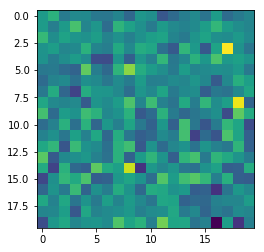

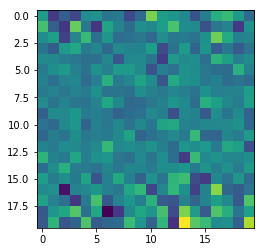

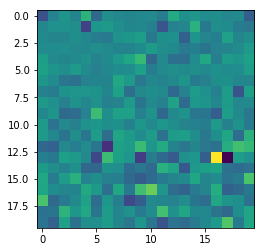

 USing ISO, n_components= 400
 shape of faces = (1000, 784)
 shape of projected faces = (1000, 400)


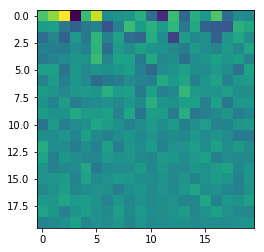

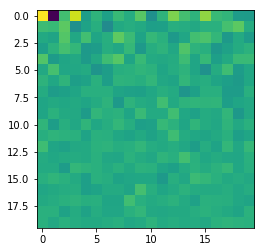

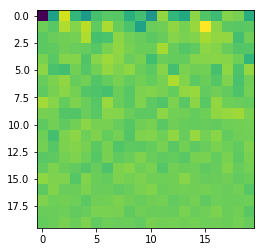

 Euclidean distances Using PCA, n_components= 400
The original distance is 14.138915061950684, the distance in the paramer reduction is 22.215588728471225
The original distance is 12.800774574279785, the distance in the paramer reduction is 23.68283180482928


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  if sys.path[0] == '':


 mean of all c = 11.956
 mean of all c = 11.956
 mean of all mds = 164.8016663262259
 Euclidean distances Using KPCA, n_components= 400
The original distance is 15.034287452697754, the distance in the paramer reduction is 1.1552335023880005
The original distance is 13.356060981750488, the distance in the paramer reduction is 1.189957857131958
 mean of all c = 11.861
 mean of all c = 11.861
 mean of all mds = 136.89472646956008
 Euclidean distances Using LLE, n_components= 400
The original distance is 13.632952690124512, the distance in the paramer reduction is 0.9590434275057834
The original distance is 11.955599784851074, the distance in the paramer reduction is 0.8600788382681002
 mean of all c = 11.942
 mean of all c = 11.942
 mean of all mds = 153.6399347791832
 Euclidean distances Using ISO, n_components= 400
The original distance is 13.717428207397461, the distance in the paramer reduction is 46.02209688745175
The original distance is 16.922414779663086, the distance in the param

In [64]:
mnistdata=pd.DataFrame(filtered_data.iloc[0:1000,:].values)
print(mnistdata.shape[0])
mnist_dataset_PCA_methods=Repeat_sections(mnistdata,400)

In [51]:
print('s')

s
